# Homework 0

## Action Castle

For the first homework, we'll implement a more complicated game based on __Action Castle__, a game in the awesome book
[Parsley](http://www.memento-mori.com/parsely-products/parsely-pdf)  by Jared A. Sorensen.

Here's a map of Action Castle.

![Map of Action Castle](map.png)

### Install required libraries

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


### Import Text Adventures

In [2]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [3]:

cottage = things.Location(
    "Cottage",
    "You are standing in a small cottage."
)
garden_path = things.Location(
    "Garden Path",
    "You are standing on a lush garden path. There is a cottage here.",
)
fishing_pond = things.Location(
    "Fishing Pond",
    "You are at the edge of a small fishing pond."
)
winding_path = things.Location(
    "Winding Path",
    "You are walking along a winding path. There is a tall tree here.",
)
top_of_tree = things.Location(
    "Top of the Tall Tree",
    "You are the top of the tall tree."
)
drawbridge = things.Location(
    "Drawbridge",
    "You are standing on one side of a drawbridge leading to ACTION CASTLE.",
)
courtyard = things.Location(
    "Courtyard",
    "You are in the courtyard of ACTION CASTLE."
)
tower_stairs = things.Location(
    "Tower Stairs",
    "You are climbing the stairs to the tower. There is a locked door here.",
)
tower = things.Location(
    "Tower",
    "You are inside a tower."
)
dungeon_stairs = things.Location(
    "Dungeon Stairs",
    "You are climbing the stairs down to the dungeon."
)
dungeon = things.Location(
    "Dungeon",
    "You are in the dungeon. There is a spooky ghost here."
)
feasting_hall = things.Location(
    "Great Feasting Hall",
    "You stand inside the Great Feasting Hall."
)
throne_room = things.Location(
    "Throne Room",
    "This is the throne room of ACTION CASTLE."
)
death = things.Location(
    "The Afterlife",
    "You are dead. GAME OVER."
)
death.set_property("game_over", True)


# Map of Locations
cottage.add_connection("out", garden_path)
garden_path.add_connection("south", fishing_pond)
garden_path.add_connection("north", winding_path)
winding_path.add_connection("up", top_of_tree)
winding_path.add_connection("east", drawbridge)
top_of_tree.add_connection("jump", death)
drawbridge.add_connection("east", courtyard)
courtyard.add_connection("up", tower_stairs)
courtyard.add_connection("down", dungeon_stairs)
courtyard.add_connection("east", feasting_hall)
tower_stairs.add_connection("up", tower)
dungeon_stairs.add_connection("down", dungeon)
feasting_hall.add_connection("east", throne_room)



###  Preliminary Game Map

Here is a visualization of the locations in action castle represented as a directed graph.

![Visualization of game map starting from the tower](../map-from-tower.svg)

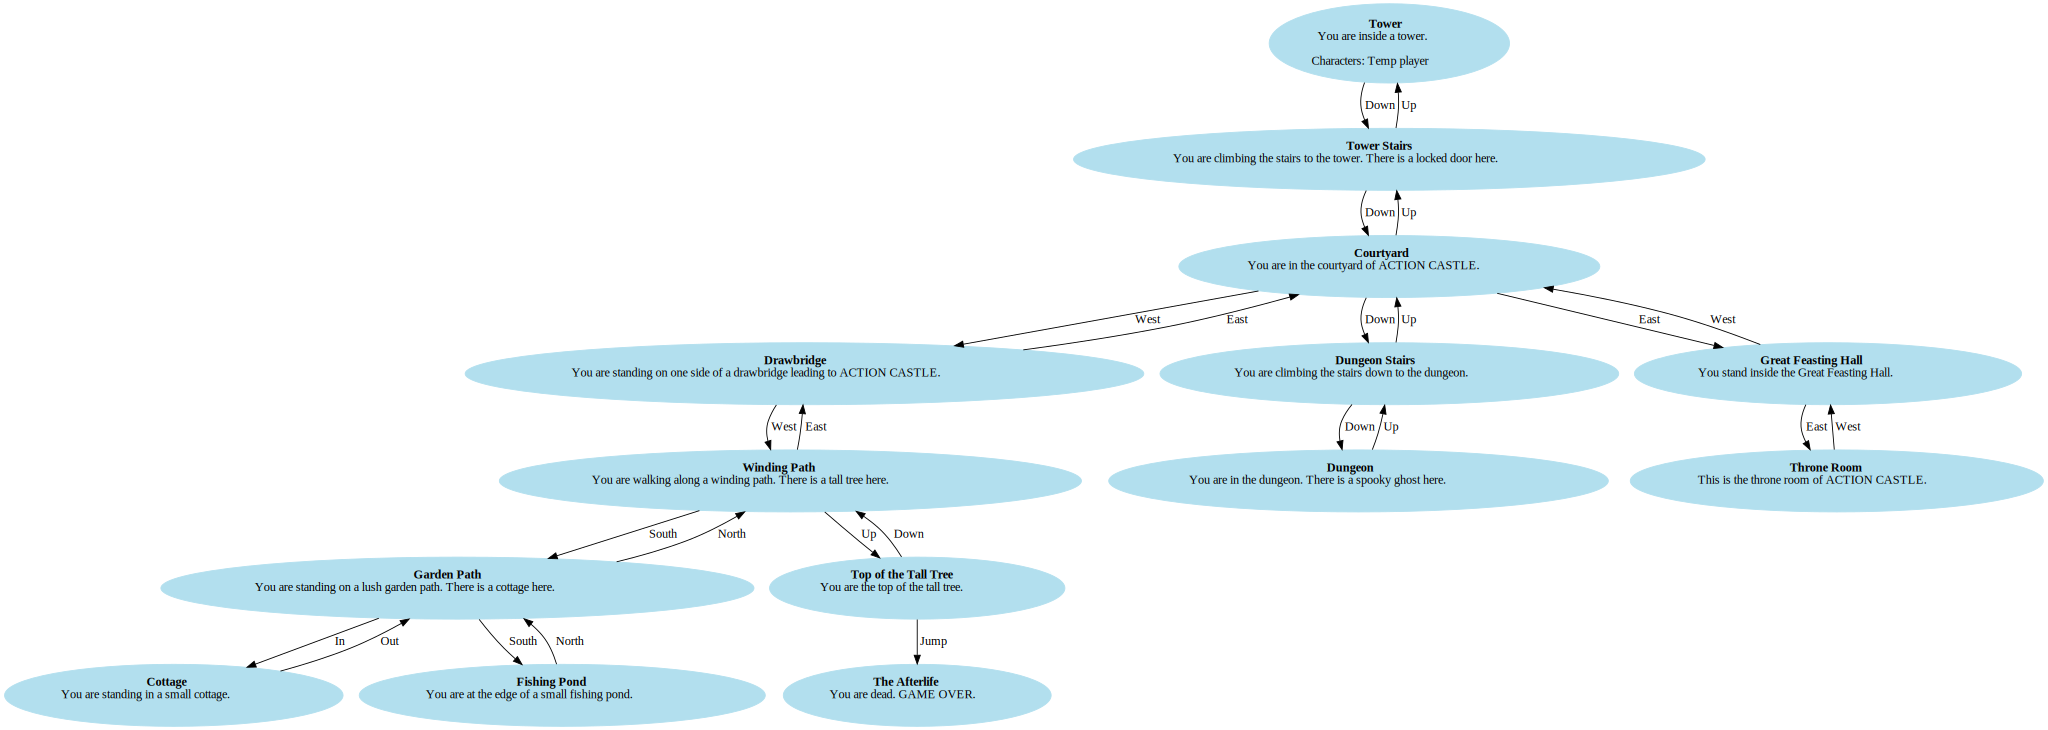

In [4]:
tempgame = games.Game(tower, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [5]:
# Put a fishing pole at the cottage
fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)
cottage.add_item(fishing_pole)


# Put a branch in a tree that could be used as a weapon
branch = things.Item(
    "branch",
    "a stout, dead branch",
    "IT LOOKS LIKE IT WOULD MAKE A GOOD CLUB.",
)
branch.set_property("is_weapon", True)
branch.set_property("is_fragile", True)
top_of_tree.add_item(branch)


# Put a candle in the feasting hall
candle = things.Item(
    "candle",
    "a strange candle",
    "THE CANDLE IS COVERED IN STARGE RUNES.",
)
candle.set_property("is_lightable", True)
candle.set_property("is_lit", False)
candle.add_command_hint("light candle")
candle.add_command_hint("read runes")
feasting_hall.add_item(candle)


### Scenery Items

_We called these "non-gettable" in the tutorial_

In [6]:
# Put an actual pond at the fishing location
pond = things.Item(
    "pond",
    "a small fishing pond",
    "THERE ARE FISH IN THE POND.",
)
pond.set_property("gettable", False)
pond.set_property("has_fish", True)
pond.add_command_hint("catch fish")
pond.add_command_hint("catch fish with pole")
fishing_pond.add_item(pond)


# A nice rosebush for the garden path
rosebush = things.Item(
    "rosebush",
    "a rosebush",
    "THE ROSEBUSH CONTAINS A SINGLE RED ROSE.  IT IS BEAUTIFUL.",
)
rosebush.set_property("gettable", False)
rosebush.set_property("has_rose", True)
rosebush.add_command_hint("pick rose")
garden_path.add_item(rosebush)


# Throne room wouldn't be that impressive without a throne
throne = things.Item(
    "throne",
    "An ornate golden throne."
)
throne.set_property("gettable", False)
throne.add_command_hint("sit on throne")
throne_room.add_item(throne)


# A door that leads to the tower stairs
door = things.Item(
    "door",
    "a door",
    "THE DOOR IS SECURELY LOCKED."
)
door.set_property("gettable", False)
door.set_property("is_locked", True)
door.add_command_hint("unlock door")
tower_stairs.add_item(door)


## Characters

### Player

In [7]:
# Player
player = things.Character(
    name="The player",
    description="You are a simple peasant destined for greatness.",
    persona="I am on an adventure.",
)

# Player's lamp
lamp = things.Item("lamp", "a lamp", "A LAMP.")
lamp.set_property("is_lightable", True)
lamp.set_property("is_lit", False)
lamp.add_command_hint("light lamp")
player.add_to_inventory(lamp)


### Non-Player Characters (NPCs)

In [8]:
# A Troll at the drawbridge
troll = things.Character(
    name="troll",
    description="A mean troll",
    persona="I am hungry. The guard promised to feed me if I guard the drawbridge and keep people out of the castle.",
)
troll.set_property("is_hungry", True)
troll.set_property("character_type", "troll")
drawbridge.add_character(troll)


# A guard in the courtyard
guard = things.Character(
    name="guard",
    description="A castle guard",
    persona="I am suspicious of anyone trying to enter the castle. I will prevent keep people from entering and learning the castle's dark secrets.",
)
guard.set_property("is_conscious", True)
guard.set_property("is_suspicious", True)
guard.set_property("character_type", "human")
courtyard.add_character(guard)

# Guard has a key
key = things.Item("key", "a brass key", "THIS LOOKS USEFUL")
guard.add_to_inventory(key)

# Guard has a sword
sword = things.Item("sword", "a short sword", "A SHARP SHORT SWORD.")
sword.set_property("is_weapon", True)
guard.add_to_inventory(sword)


# A Princess in the tower
princess = things.Character(
    name="princess",
    description="A princess who is beautiful and lonely. She awaits her non-gender-stereotypical soulmate.",
    persona="I am the princess. I am grieving my father's death. I feel alone.",
)
princess.set_property("is_royal", True)
princess.set_property("emotional_state", "sad and lonely")
princess.set_property("is_married", False)
princess.set_property("character_type", "human")
tower.add_character(princess)


# A ghost in the dungeon
ghost = things.Character(
    name="ghost",
    description="A ghost with bony, claw-like fingers and who is wearing a crown.",
    persona="I was murdered by the guard. I will haunt this castle until banished. If you linger before my apparition, I will plunge my ghostly hand inside you and stop your heart",
)
ghost.set_property("character_type", "ghost")
ghost.set_property("is_dead", True)
ghost.set_property("is_banished", False)
dungeon.add_character(ghost)

# Ghost's crown
crown = things.Item("crown", "a crown", "A CROWN FIT FOR A KING.")
crown.add_command_hint("wear crown")
ghost.add_to_inventory(crown)



## Actions

Your job in this homework is to put the action in _Action Castle_! We will implement an action for each of the following:

- Unlock a door
- Read Runes
- Propose
- Wear the crown
- Sit on a throne

In [9]:
class Unlock_Door(actions.Action):
    ACTION_NAME = "unlock door"
    ACTION_DESCRIPTION = "Unlock a door with a key"
    ACTION_ALIASES = ["open door"]
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character = game.player
        self.key = self.parser.match_item("key", self.parser.get_items_in_scope(self.character))
        self.door = self.parser.match_item("door", self.parser.get_items_in_scope(self.character))
        # HINT: take a look at text_adventures/actions for some examples of actions!

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a door
        * The character must be at the same location as the door
        * The door must be locked
        * The character must have the key in their inventory
        """
        # TODO - your code here
        
        if self.door and (self.door.get_property("is_locked") == True) and self.key:
            return True
        
        self.parser.fail("You can't unlock that.")
        return False

    def apply_effects(self):
        """
        Effects:
        * Unlocks the door
        """
        # TODO - your code here
        self.door.set_property("is_locked", False)
        self.parser.ok("Door is now unlocked.")

In [10]:
class Read_Runes(actions.Action):
    """
    Reading the runes on the candle with strange runes on it will banish the
    ghost from the dungeon, and cause it to drop the crown.
    """
    ACTION_NAME = "read runes"
    ACTION_DESCRIPTION = "Read runes off of the candle"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character: things.Character = game.player
        self.candle: things.Item = game.parser.match_item("candle", self.parser.get_items_in_scope(self.character))
        self.ghost: things.Character = game.characters.get("ghost")
        

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a candle with strange runes on it
        * The character must have the candle in their inventory
        * the ghost must be in this location
        * The candle must be lit
        """
        # TODO - your code here
        is_candle_lit = self.candle and self.candle.get_property("is_lit")
        is_ghost_here = self.ghost and (self.ghost.location == self.character.location)
        if is_candle_lit and is_ghost_here:
            return True
        
        self.parser.fail("You can't read the runes and the ghost is not here.")
        return False

    def apply_effects(self):
        """
        Effects:
        * Banishes the ghost, causing it to drop its inventory.
        """
        # TODO - your code here
        current_location = self.ghost.location
        current_location.add_item(self.ghost.inventory.get("crown"))
        self.ghost.remove_from_inventory(self.ghost.inventory.get("crown"))
        self.parser.ok("The ghost dropped its crown.")
        self.ghost.set_property("is_banished", True)
        self.parser.ok("The ghost is banished!")
        


In [11]:
class Propose(actions.Action):
    """
    Mawwige is whut bwings us togevveh today.
    """
    ACTION_NAME = "propose to the princess"
    ACTION_DESCRIPTION = "Propose marriage to someone"
    ACTION_ALIASES = ["propose to the princess"]


    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.proposer: things.Character = game.player
        self.propositioned: things.Character = game.characters.get("princess")

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The two characters must be in the same place
        * Neither can be married yet
        * Both must be happy
        """
        # TODO - your code here
        same_place = self.proposer.location == self.propositioned.location
        not_married = self.proposer.get_property("is_married") == False and self.propositioned.get_property("is_married") == False
        are_happy = self.proposer.get_property("emotional_state") == "happy" and self.propositioned.get_property("emotional_state") == "happy"
        if same_place and (not_married == False) and are_happy:
            return True

        self.parser.fail("You both cannot propose to each other")
        return False

    def apply_effects(self):
        """
        Effects:
        * They said "Yes!"
        * They are married.
        * If one is a royal, they are now both royals
        """
        # TODO - your code here
        self.parser.ok("They said yes! They're married now!")
        self.proposer.set_property("is_married", True)
        self.propositioned.set_property("is_married", True)

        if self.proposer.get_property("is_royal") or self.propositioned.get_property("is_royal"):
            self.proposer.set_property("is_royal", True)
            self.propositioned.set_property("is_royal", True)
            self.parser.ok("They are now both royals!")


In [12]:
class Wear_Crown(actions.Action):
    ACTION_NAME = "wear crown"
    ACTION_DESCRIPTION = "Put a crown in your inventory atop your head"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character: things.Character = game.player
        self.crown: things.Item = game.parser.match_item("crown", self.parser.get_items_in_scope(self.character))

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The crown must be in the character's inventory
        * The the character must be a royal
        """
        # TODO - your code here
        is_royal = self.character.get_property("is_royal")
        has_crown = self.character.is_in_inventory(self.crown)
        if is_royal and has_crown:
            return True
        
        self.parser.fail("You can't wear the crown.")
        return False

    def apply_effects(self):
        """
        The character is crowned.
        """
        # TODO - your code here
        self.character.set_property("is_crowned", True)
        self.character.remove_from_inventory(self.crown)
        self.parser.ok("You are now crowned.")



In [13]:
class Sit_On_Throne(actions.Action):
    ACTION_NAME = "sit on throne"
    ACTION_DESCRIPTION = "Sit on the throne, if you are royalty"
    ACTION_ALIASES = ["get on throne"]
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character: things.Character = game.player
        self.throne: things.Item = game.parser.match_item("throne", self.parser.get_items_in_scope(self.character))

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as the throne
        * The the character must be a royal
        """
        # TODO - your code here
        same_place = self.character.location == self.throne.location
        is_royal = self.character.get_property("is_royal")
        if same_place and is_royal:
            return True
        
        self.parser.fail("You can't sit on the throne.")
        return False

    def apply_effects(self):
        """
        The character is crowned.
        """
        # TODO - your code here
        self.parser.ok("You are now crowned.")
        self.character.set_property("is_reigning", True)


## Blocks

In text adventure games, _blocks_ are essentially puzzles to unlock the next stage in the game.

We give you a `Troll_Block` for an example of what an implementation looks like.

You should implement:
* The guard block (similar to the troll block)
* The darkness block (unblocked if any character at the location is carrying
  a lit item (like a lamp or candle)
* A locked door block

In [14]:
# Sample Block

class Troll_Block(blocks.Block):
    """
    Blocks progress in this direction until the troll is no longer hungry, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, troll: things.Character):
        super().__init__(
            "A troll blocks your way", "A hungry troll blocks your way"
        )
        self.location = location
        self.troll = troll

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a troll here
        # * The troll is alive and conscious
        # * The troll is still hungry
        if self.troll:
            if not self.location.here(self.troll):
                return False
            if self.troll.get_property("is_dead"):
                return False
            if self.troll.get_property("is_unconscious"):
                return False
            if self.troll.get_property("is_hungry"):
                return True
        return False


In [15]:
class Guard_Block(blocks.Block):
    """
    Blocks progress in this direction until the guard is no longer suspicious, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, guard: things.Character):
        super().__init__(
            "A guard blocks your way", "The guard refuses to let you pass."
        )
        # TODO - your code here
        self.location = location
        self.guard = guard

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a guard here
        # * The guard is alive and conscious
        # * The guard is suspicious
        if self.guard:
            if not self.location.here(self.guard):
                return False
            if self.guard.get_property("is_dead"):
                return False
            if self.guard.get_property("is_unconscious"):
                return False
            if self.guard.get_property("is_suspicious"):
                return True
        return False

In [16]:
class Darkness(blocks.Block):
    """
    Blocks progress in this direction unless the character has something that lights the way.
    """

    def __init__(self, location: things.Location):
        super().__init__("Darkness blocks your way", "It's too dark to go that way.")
        # TODO - your code here
        self.location = location

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The location is dark
        # * Unblocked if any character at the location is carrying a lit item 
        #   (like a lamp or candle)
        if self.location:
            get_lamp = self.location.characters.get("The player").inventory.get("lamp")
            get_candle = self.location.characters.get("The player").inventory.get("candle")
            if (get_candle is not None and get_lamp.get_property("is_lit")) or (get_candle is not None and get_candle.get_property("is_lit")):
                return False
        
        return True

In [17]:
class Door_Block(blocks.Block):
    """
    Blocks progress in this direction until the character unlocks the door.
    """

    def __init__(self, location: things.Location, door: things.Item):
        super().__init__("A locked door blocks your way", "The door ahead is locked.")
        # TODO - your code here
        self.location = location
        self.door = door

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The door is locked
        # TODO - your code here
        if self.location: 
            if self.door.get_property("is_locked") and self.door:
                return True
        return False

In [18]:
# TODO Add blocks to location to:
# * the courtyard - the guard prevents you from going East
# * the dungeon_stairs - the darkness prevents you from going Down
# * the tower stairs - the locked door prevents you from going Up

troll_block = Troll_Block(drawbridge, troll)
guard_block = Guard_Block(courtyard, guard)
darkness_block = Darkness(dungeon_stairs)
door_block = Door_Block(tower_stairs, door)

drawbridge.add_block("east", troll_block)
courtyard.add_block("east", guard_block)
dungeon_stairs.add_block("down", darkness_block)
tower_stairs.add_block("up", door_block)


## Play Action Castle

In [19]:
class ActionCastle(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """ 
        Checks whether the game has been won. For Action Castle, the game is won
        once any character is sitting on the throne (has the property is_reigning).
        """
        for name, character in self.characters.items():
            if character.get_property("is_reigning"):
                msg = "{name} is now reigns in ACTION CASTLE! {name} has won the game!"
                self.parser.ok(msg.format(name=character.name.title()))
                return True
        return False

In [20]:

characters = [troll, guard, princess, ghost]
custom_actions = [Unlock_Door, Read_Runes, Propose, Wear_Crown, Sit_On_Throne]

# The Game
game = ActionCastle(cottage, player, characters=characters, custom_actions=custom_actions)


In [21]:
game.game_loop()

You are standing in a small cottage.
Exits:
Out to Garden Path

You see:
 * a fishing pole


The player got the pole.
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


You are at the edge of a small fishing pond.
Exits:
North to Garden Path

You see:
 * a small fishing pond
        catch fish with pole
        catch fish


The player dips their hook into the pond and catches a fish
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


The player picked the lone rose from the rosebush
The player smells the rose. It smells sunny and cheerful.
The player is happy.
You are walking along a winding path. There is a tall tree here.
Exits:
South to Garden Path
Up to Top of the Tall Tree
East to Drawbridge




You are the top of the tall tree.
Exits:
Down

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c53bb044-3953-42b6-83c3-748d614c1905' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>